#### Plotting Standard Normal Distribution $$\sim \mathcal{N}(0,\,1)$$

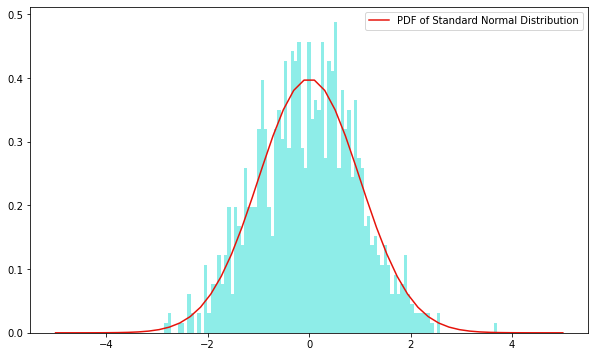

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

n = np.random.randn(1000);    # 1000 Standard normal random numbers N(0,1).
ax = plt.gca();
ax.hist(n, bins = 100, density = True, color = "#8eede8");
x = np.linspace(-5,5);
y = 1/math.sqrt(2*math.pi) * np.exp( -x**2/2 );
plt.gca().plot(x,y,c ='#e6130b');
plt.legend(["PDF of Standard Normal Distribution"], loc ="upper right");

#### Plotting Normal Distribution with mean $\mu$ and standard deviation $\sigma$ $$X \sim \mathcal{N}(\mu,\,\sigma^{2})$$

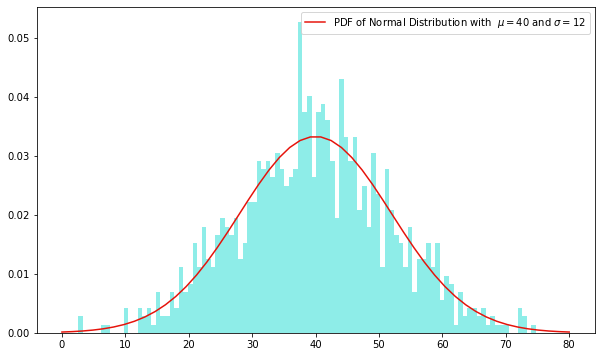

In [10]:
mu = 40;
sigma = 12;
n = sigma * np.random.randn(1000) + mu;    # 1000 Standard normal random numbers N(40,144).
ax = plt.gca();
ax.hist(n, bins = 100, density = True, color = "#8eede8");
x = np.linspace(0,80);
y = 1/math.sqrt(2*math.pi*144) * np.exp( -(x-40)**2/(2*144) );
plt.gca().plot(x,y,c ='#e6130b');
plt.legend(["PDF of Normal Distribution with  $\mu=40$ and $\sigma=12$"], loc ="upper right");

#### The Central Limit Theorem

If $X_i$ are independent identically distributed random variables with mean $\mu$ and standard deviation $\sigma$ then
their average

$$ \overline{X}_n=\frac{1}{n} \sum_{i=1}^n X_i $$

is approximately normally distributed with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$ for large enough $n$. i.e.
$$Y_n=\frac{\sqrt{n} (\overline{X}_n - \mu) }{\sigma} = \sum_{i=1}^n \frac{X_i-\mu}{\sigma \sqrt{n}} $$
converges in distribution to a standard normal distribution as $n \to \infty$.

We have rescaled $\overline{X}_n$ by $\mu$ and divided by $\frac{\sigma}{\sqrt{n}}$ so that its centered $\mu = 0$ and $\sigma = 1$. We will simulate **CLT** numerically by generating 100000 samples of the random variable $Y_n$ for $n=100$ and we will see if a histogram of the results is approximately normally distributed.
We will try the case when each $X_i$ is **uniformly distributed on $[0,1]$ with $\mu = 0.5$ and $\sigma = \frac{1}{\sqrt{12}}$ since $\mu = \frac{a+b}{2} $ and $\sigma^{2} = \frac{(b-a)^2}{12}$. for $X \sim U[a,b]$**.

$X$ is a random matrix containing 100000 rows and 100 columns. Each column corresponds to a value of the index $i$. Each row corresponds to a different random sample of $Y_n$.

The shape of X is: (100000, 100).
The shape of Y is: (100000,).


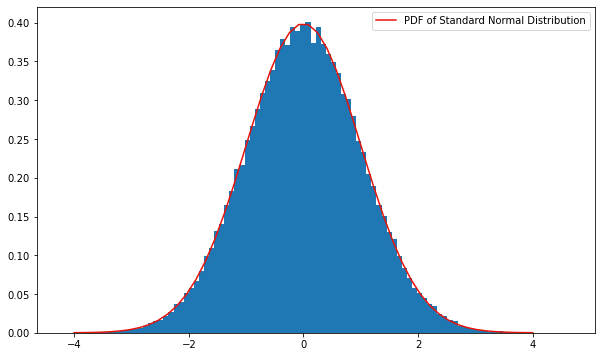

In [17]:
n = 100;
N = 100000;    # Number of samples.
X = np.random.rand(N,n);    # Nxn matrix of Uniform Random Numbers between 0 and 1.
print(f"The shape of X is: {X.shape}.");
mu = 0.5;    # Mean of Uniform distribution U[0,1].
sigma = math.sqrt(1/12);    # Standard Deviation of Uniform distribution U[0,1].
Y = np.sum( (X-mu)/(sigma*math.sqrt(n)), 1); # Summing horizontally(add up the columns).Y is Nx1 matrix. If the second 
                                             # argument is 0 instead of 1 then we sum vertically(add up rows). 
print(f"The shape of Y is: {Y.shape}.");
plt.gca().hist(Y, bins=100, density=True);    # Plotting histogram of Y. density gives proportion in each bin.
x = np.linspace(-4,4);
y = 1/math.sqrt(2*math.pi) * np.exp(-x**2/2);    # PDF of Standard Normal Distribution.
plt.gca().plot(x,y,c ='#e6130b');   # Superimposing PDF of Standard Normal Distribution.
plt.legend(["PDF of Standard Normal Distribution"], loc ="upper right");